<a id='start'></a>
# Decision Tree

In questo notebook viene spiegato cosa sono e come possiamo realizzare dei Decision Tree con Python. <br>
<br>
Il notebook è suddiviso nelle seguenti sezioni:<br>
- [Definizione](#section1)
- [Esempio](#section2)
- [Lavoriamo con Python](#section3)
- [I boosted decision trees](#section4)

<a id='section1'></a>
## Definizione

I Decision Tree sono dei classificatori che utilizzano il ML supervisionato e che con meccanismi probabilistici offorono supporto nei problemi di decisione. 

Come ogni altro classificatore, i DT sono in grado di predirre un etichetta per un set di dati di esempio. I DT realizzano questo compito esaminando i risultati probabilistici delle caratteristiche dei dati di esempio.


I Decision Tree hanno alcune caratteristiche che li rendono unici:
- Il decision tree è strutturato come un diagramma a flowchart. Ha un solo nodo radice da cui parte la valutazione e può contenere uno o più nodi foglie e diversi nodi interni;
- Ogni nodo del decision tree rappresenta il test di una singola feature dei dati in ingresso. Per esempio, si può verificare se una feature chiamata *age* sia o meno maggiore di 18;
- Ogni bivio nel decision tree connette due nodi, un nodo originario e uno di destinazione. Un bivio rappresenta un risultato del test effettuato sul nodo padre. Nel nostro esempio, se stiamo testando *age > 18*, possiamo avere due possibili bivi: True e False. Ognuno di questi due bivi connetterà il nodo che descrive il test *age > 18 node* con altri due nodi di destinazione.
- Ogni nodo foglia dell'albero di decisione rappresenta una classificazione. L'obiettivo dell'albero è quello di dare un'etichetta ai dati di input e quindi ogni foglia rappresenta l'etichetta assegnata al dato passato nell'albero di decisione.

<a id='section2'></a>
## Esempio

Un insegnante ritiene che ci debba essere una relazione tra il livello di salute dei suoi studenti, il numero di ore di studio e i voti finali. <br>
Per decidere la correlazione, chiede a 75 dei suoi studenti quante ore a
settimana passano a studiare. Sembra ragionevole iniziare con questa domanda, in quanto dovrebbe avere il maggior impatto sui loro voti. <br>

<img src='img/histogram.jpg'> <br>

Fantastico! L'insegnante nota che il 100% degli studenti in difficoltà studia meno di 2,5 ore settimanali. Altrettanto interessante è notare che tra gli studenti che passano il corso, alcuni di loro studiano molto, altri ancora studiano solo a un livello medio. Per classificare correttamente questi studenti, sono sicuramente necessari più dati.

Essendo curioso, l'insegnante chiede agli studenti un'altra domanda: quanto sono attenti alla loro salute, in special modo relativamente al cibo che mangiano, su una scala da 1 a 5? Preferiscono del junk food (1) o mangiare una salutare mela (5)? <br>

<img src="img/decision_tree.jpg"> <br>

Gli studenti iniziano a rispondere e qualcosa attira l'attenzione dell'insegnante. Con una sola eccezione, ogni singolo studente che non prende sul serio le proprie abitudini alimentari e di salute, rispondendo con meno di 3,3 al sondaggio con scala 5, ha voti più bassi.

Come l'insegnante continua a fare domande per scoprire maggiori dettagli sui suoi studenti, noi possiamo classificarli con maggior correttezza. Questo procedimento costruisce alberi decisionali che permettono di tagliare con crescente precisione lo spazio delle caratteristiche delle osservazioni per purificare la classe dei campioni.

Questo è come potrebbe apparire un albero decisionale per l'esempio sopra riportato:

<img src="img/decision_tree_1.jpg"> <br>

Il nodo radice inizia con tutti gli esempi. I valori [25, 25, 25] rappresentano tutti gli studenti dell'insegnante che appartengono a tre classi: scansafatiche, medio e secchione, in quest'ordine.

Al primo nodo, c'è un alto livello di impurità.  La funzione considerata dal nodo radice è il numero di ore trascorse a studiare a settimana e la decisione presa è <= 2.45 o superiore.

In questo albero, ogni ramo sinistro rappresenta una risposta True alla domanda decisionale, e ogni ramo destro è una risposta False. Gli studenti che trascorrono <= 2,45 ore alla settimana appartengono tutti alla prima classe, valore = [25, 0, 0] e quindi il ramo ha un'impurezza di 0,0.

Gli studenti che trascorrono più di 2,45 ore a settimana studiando compongono il resto del corpo studentesco. Gli studenti in questo caso si dividono esattamente a metà tra le due classi.

In altre parole, questo ramo ha valori molto mischiati. Una ulteriore classificazione binaria può essere possibile. Ecco perché l'impurità è impostata al 100% qui. Ma testando la funzione di consapevolezza della salute, l'insegnante è in grado di purificare considerevolmente le selezioni risultanti, in modo tale che solo un campione di uno studente sia classificato erroneamente su entrambi i lati.

<a id='section3'></a>
## Lavoriamo con Python

In [37]:
import pandas as pd

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

Importiamo un dataset sui funghi dove le diverse specie sono classificate tra commesibili, velenose, di commestibilità sconosciuta o non raccomandate.

Informazioni sul dataset possono essere [trovate qui](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.names).

Carichiamo il dataset di funghi in X e verifichiamo di averlo fatto correttamente e di non aver incluso alcuna funzione che chiaramente non dovrebbe far parte del set di dati.

In [38]:
X = pd.read_csv("data/agaricus-lepiota.data", na_values='?')
X.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


I dati non hanno intestazione. Fixiamo questo problema leggendo i riferimenti nel link fornito precedentemente.

In [39]:
X.columns = ['classification', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']
X.head()

,classification,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


Eliminiamo i valori con NA.

In [40]:
print("Old dataset's shape:", X.shape)
X = X.dropna()
print("New dataset's shape:", X.shape)

Old dataset's shape: (8123, 23)
New dataset's shape: (5643, 23)


Copiamo le etichette della classificazione in un'altra variabile `y` e rimuoviamoli dal dataset `X`.

Possiamo quindi encodare le etichette usando la funzione `.map()`.

In [41]:
y = X[['classification']].copy()
y.classification = y.classification.map({'e':0, 'p':1})
X = X.drop(['classification'], axis = 1)
#get_dummies -> Convert categorical variable into dummy/indicator variables
X = pd.get_dummies(X, columns=['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat'])

In [42]:
type(y)

pandas.core.frame.DataFrame

In [43]:
X

,cap_shape_b,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_surface_f,cap_surface_g,cap_surface_s,cap_surface_y,...,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7985,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
8000,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
8037,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
8094,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


Dividiamo i nostri dati in due sottoinsiemi: `test` e `train`. La numerosità di `test` dovrebbe essere circa il 30%.

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Creiamo un classificatore DT:

In [45]:
def dct_f(X_train, y_train):
    dct = tree.DecisionTreeClassifier()
    dct.fit(X_train, y_train)
    
    #DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=9, 
    #                       min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
    #                       random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
    #                       class_weight=None, presort=False)
    
    return dct

A questo punto possiamo addestrare il classificatore sui dati training; successivamente possiamo utilizzare il classificatore sull'intero dataset di test:

In [46]:
dct = dct_f(X_train, y_train)
score = dct.score(X_test, y_test)
print("High-Dimensionality Score:", score)

High-Dimensionality Score: 1.0


Usa il codice sulla pagina SciKit-Learn del corso per produrre un file .DOT, quindi renderizza il file .DOT in .PNGs.

Avrai bisogno di graphviz installato per farlo. Su macOS, puoi `brew install graphviz`. Su Windows 10, graphviz si installa tramite un programma di installazione .msi che è possibile scaricare dal sito Web graphviz. Inoltre, un editor grafico, gvedit.exe può essere utilizzato per visualizzare l'albero direttamente dal file tree.dot esportato senza dover effettuare una chiamata. Su altri sistemi, usa comandi analoghi.

Se incontri problemi con l'installazione di graphviz o non ne detieni i diritti, puoi sempre visualizzare il tuo file .dot sul sito web: http://webgraphviz.com/.

In [48]:
# With the following sintax we will create a .dot file with the code for visualizing th tree
tree.export_graphviz(dct, out_file='out/tree.dot', feature_names=X.columns)

Possiamo utilizzare il sito Web: http://webgraphviz.com/ e allegare il codice per visualizzare il seguente albero. <br>
<img src="img/decision_tree_3.jpg">

<a id='section4'></a>
## I boosted decision trees

Come visto i decision tree prendono un insieme di feature e le utilizzano per suddividere i dati in input in modo ricorsivo sulla base dei valori che queste feature hanno.

I boosted decision trees sono una modalità di **decision trees learning**, ovvero di apprendiamento utilizzando i decision tree, che utilizza un albero decisionale (come modello predittivo) per passare dalle osservazioni su un oggetto (rappresentato nei rami) alle conclusioni sul valore obiettivo dell'articolo (rappresentato nelle foglie).

I modelli ad albero in cui la variabile target può assumere un insieme discreto di valori sono chiamati **alberi di classificazione**; in queste strutture ad albero, le foglie rappresentano le etichette delle classi e i rami rappresentano le congiunzioni delle caratteristiche che portano a quelle etichette delle classi.

Gli alberi decisionali in cui la variabile target può assumere valori continui (in genere numeri reali) sono chiamati **alberi di regressione**.


La metodologia di boosting permette di combinare diversi alberi (che sono __weak learners__) in modo da ottere un classificatore forte. Solitamente il processo che si segue è questo:
- ogni albero è creato iterativamente
- all'autoput di un albero è assegnato un peso relativo alla sua accuratezza
- l'output del classificatore è la somma pesata di tutti i risultati dei vari alberi
- dopo ogni iterazione, i dati in input ricevono un peso basato sulla loro misclassificaizone (più spesso un dato viene classificato in modo erreto, più importante diventa)
- si definisce quindi una funzione di ottimizzazione che si mira a minimizzare.

Per mostrare questa metodologia utilizziamo le API python per la libreria XGBoost (eXtreme Gradient Boosting) con pip.

I dati che utilizzeremo in questo esempio sono ricavati da una competizione fatta da [Atlas](https://home.cern/about/experiments/atlas) su [Kaggle](https://www.kaggle.com/). La competizione aveva lo scopo di identificare gli venti __Higgs to tau tau__.

Ecco il link alla sfida: [the Higgs Boson Machine Learning Challenge](https://www.kaggle.com/c/higgs-boson/data) dove potete trovare i dati di 250,000 eventi simulati di Atlas etichettati ed esportati in formato CSV secondo la specifica descritta [qui](https://www.kaggle.com/c/higgs-boson/data) e [qui](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf).

Potete procedere a scaricare l'interno dataset, in questo notebook useremo un sotto insieme (di circa 10.000 eventi).

In [59]:
# pip install xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

In [60]:
data = pd.read_csv('data/training_10k.csv')

print('Size of data: {}'.format(data.shape))
print('Number of events: {}'.format(data.shape[0]))
print('Number of columns: {}'.format(data.shape[1]))

print ('\nList of features in dataset:')
for col in data.columns:
    print(col)

Size of data: (10000, 33)
Number of events: 10000
Number of columns: 33

List of features in dataset:
EventId
DER_mass_MMC
DER_mass_transverse_met_lep
DER_mass_vis
DER_pt_h
DER_deltaeta_jet_jet
DER_mass_jet_jet
DER_prodeta_jet_jet
DER_deltar_tau_lep
DER_pt_tot
DER_sum_pt
DER_pt_ratio_lep_tau
DER_met_phi_centrality
DER_lep_eta_centrality
PRI_tau_pt
PRI_tau_eta
PRI_tau_phi
PRI_lep_pt
PRI_lep_eta
PRI_lep_phi
PRI_met
PRI_met_phi
PRI_met_sumet
PRI_jet_num
PRI_jet_leading_pt
PRI_jet_leading_eta
PRI_jet_leading_phi
PRI_jet_subleading_pt
PRI_jet_subleading_eta
PRI_jet_subleading_phi
PRI_jet_all_pt
Weight
Label


Il set di dati ha 10.000 eventi con 33 colonne ciascuno. Sembra che la prima colonna sia un identificatore e non dovrebbe essere utilizzata come funzionalità. Le ultime due colonne "Peso" ed "Etichetta", sono i pesi e le etichette della simulazione, e inoltre non dovrebbero essere utilizzate come caratteristiche (queste informazioni sono tutte contenute nella documentazione).

Ora possiamo vedere quanti eventi sono segnale e sfondo:

In [61]:
# look at column labels --- notice last one is "Label" and first is "EventId" also "Weight"
print('Number of signal events: {}'.format(len(data[data.Label == 's'])))
print('Number of background events: {}'.format(len(data[data.Label == 'b'])))
print('Fraction signal: {}'.format(len(data[data.Label == 's'])/(float)(len(data[data.Label == 's']) + len(data[data.Label == 'b']))))

Number of signal events: 3372
Number of background events: 6628
Fraction signal: 0.3372


In [62]:
data['Label'] = data.Label.astype('category')

from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.2)

Il modello DMatrix prende come argomenti:

- data --- le feature
- label --- 1/0 o true/false per i dati binari (dobbiamo convertire i nostri dati da s/b a un valore booleano)
- missing --- come vengono rappresnetati i dati mancanti (per esempio possiamo usare -999.0)
- feature_names --- il nome di tutte le feature (optionale)

In [63]:
feature_names = data.columns[1:-2]  # we skip the first and last two columns because they are the ID, weight, and label

train = xgb.DMatrix(data=data_train[feature_names],
                    label=data_train.Label.cat.codes,
                    missing=-999.0,
                    feature_names=feature_names)

test = xgb.DMatrix(data=data_test[feature_names],
                   label=data_test.Label.cat.codes,
                   missing=-999.0,
                   feature_names=feature_names)

I parametri di XGBoost hyperparameters dono descritti in [questa guida](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/).

In generale, i parametri modificabili in XGBoost rientrano in tre categorie:

1. Parametri generali - Es. : quale booster usare, numero di thread. Non scherzerò con nessuno di questi qui.
1. Parametri booster - Ottimizza l'effettivo potenziamento. Es .: tasso di apprendimento. Questi sono quelli da ottimizzare.
1. Parametri dell'attività di apprendimento: definire la funzione obiettivo e le metriche di valutazione.

Qui, useremo i valori predefiniti per la maggior parte dei parametri e ne imposteremo solo alcuni per vedere come è fatto. I parametri vengono passati come dizionario o elenco di coppie.

In [64]:
param = {}

# Booster parameters
param['eta']              = 0.1 # learning rate
param['max_depth']        = 10  # maximum depth of a tree
param['subsample']        = 0.8 # fraction of events to train tree on
param['colsample_bytree'] = 0.8 # fraction of features to train tree on

# Learning task parameters
param['objective']   = 'binary:logistic' # objective function
param['eval_metric'] = 'error'           # evaluation metric for cross validation
param = list(param.items()) + [('eval_metric', 'logloss')] + [('eval_metric', 'rmse')]

num_trees = 100  # number of trees to make

Ora possiamo addestrare il nostro modello.

Quindi guardiamo le sue prestazioni e proviamo a migliorare il modello, se necessario. Possiamo provare a migliorarlo migliorando / aggiungendo funzionalità, aggiungendo più dati di allenamento, usando più iterazioni di potenziamento o ottimizzando gli iperparametri (idealmente in questo ordine).

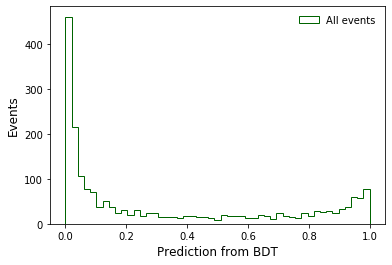

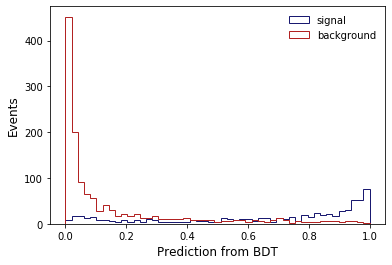

In [65]:
booster = xgb.train(param, train, num_boost_round=num_trees)

predictions = booster.predict(test)

# plot all predictions (both signal and background)
plt.hist(predictions, bins=np.linspace(0,1,50), histtype='step', color='darkgreen', label='All events')

plt.xlabel('Prediction from BDT', fontsize=12)
plt.ylabel('Events', fontsize=12)
plt.legend(frameon=False)
plt.show()

# plot signal and background separately
plt.hist(predictions[test.get_label().astype(bool)], bins=np.linspace(0,1,50),
         histtype='step', color='midnightblue', label='signal')
plt.hist(predictions[~(test.get_label().astype(bool))], bins=np.linspace(0,1,50),
         histtype='step', color='firebrick', label='background')

plt.xlabel('Prediction from BDT',fontsize=12)
plt.ylabel('Events',fontsize=12)
plt.legend(frameon=False)
plt.show()

Per ottenere la predizione, binaria, di nostro interesse dobbiamo andare a trasformare la predizione in un valore 0 o 1 che possa quindi essere messo in relazione con le categorie 'signal' e 'background' che stiamo cercando.

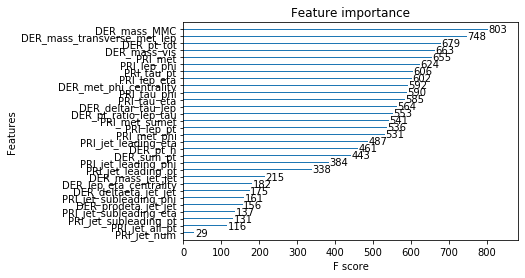

In [66]:
xgb.plot_importance(booster, grid=False)
plt.show()

In [67]:
d = data_train.copy()

d['prediction'] = np.around(booster.predict(train)).astype('int64')
d['prediction'] = d['prediction'].map({1: 's', 0: 'b'})

d[['prediction', 'Label']]

,prediction,Label
4839,b,b
1372,b,b
6997,b,b
9215,b,b
414,s,s
...,...,...
5466,b,b
1640,s,s
8186,b,b
2322,b,b


In [71]:
right = d.loc[d['prediction'] == d['Label']]
wrong = d.loc[d['prediction'] != d['Label']]

true_positive = right.loc[right['prediction'] == 's']
false_positive = wrong.loc[wrong['prediction'] == 's']
false_negative = wrong.loc[wrong['prediction'] == 'b']

print("We had %d elements in our recordset." % len(d))
print("We classified correctly %d events." % len(right))
print("We classified wrongly %d events." % len(wrong))
print("We had %d false positive and %d false negative." % (len(false_positive), len(false_negative)))

print("")

print("Our precision has been %1.2f." % (len(true_positive)/(len(true_positive) + len(false_positive))))
print("Our recall has been %1.2f." % (len(true_positive)/(len(true_positive) + len(false_negative))))

We had 8000 elements in our recordset.
We classified correctly 7978 events.
We classified wrongly 22 events.
We had 10 false positive and 12 false negative.

Our precision has been 1.00.
Our recall has been 1.00.


[Clicca qui per tornare all'inizio della pagina](#start)<a id='start'></a>